# Bondora Data Preprocessing 

In this project we will be doing credit risk modelling of peer to peer lending Bondora systems.Data for the study has been retrieved from a publicly available data set of a leading European P2P lending platform  ([**Bondora**](https://www.bondora.com/en/public-reports#dataset-file-format)).The retrieved data is a pool of both defaulted and non-defaulted loans from the time period between **1st March 2009** and **27th January 2020**. The data
comprises of demographic and financial information of borrowers, and loan transactions.In P2P lending, loans are typically uncollateralized and lenders seek higher returns as a compensation for the financial risk they take. In addition, they need to make decisions under information asymmetry that works in favor of the borrowers. In order to make rational decisions, lenders want to minimize the risk of default of each lending decision, and realize the return that compensates for the risk.

In this notebook we will preprocess the raw dataset and will create new preprocessed csv that can be used for building credit risk models.

# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
# To show all the rows of pandas dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row',None)
import warnings
warnings.filterwarnings("ignore")

# Understanding Data

| Feature                                | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
|----------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ActiveLateCategory                     | When a loan is in Principal Debt then it will be categorized by Principal Debt days                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| ActiveLateLastPaymentCategory          | Shows how many days has passed since last payment and categorised if it is overdue                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| ActiveScheduleFirstPaymentReached      | Whether the first payment date has been reached according to the active schedule                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| Age                                    | The age of the borrower when signing the loan application                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| Amount                                 | Amount the borrower received on the Primary Market. This is the principal balance of your purchase from Secondary Market                                                                                                                                                                                                                                                                                                                                                                                            |
| AmountOfPreviousLoansBeforeLoan        | Value of previous loans                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| AppliedAmount                          | The amount borrower applied for originally                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| AuctionBidNumber                       | Unique bid number which is accompanied by Auction number                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| AuctionId                              | A unique number given to all auctions                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| AuctionName                            | Name of the Auction, in newer loans it is defined by the purpose of the loan                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| AuctionNumber                          | Unique auction number which is accompanied by Bid number                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| BidPrincipal                           | On Primary Market BidPrincipal is the amount you made your bid on. On Secondary Market BidPrincipal is the purchase price                                                                                                                                                                                                                                                                                                                                                                                           |
| BidsApi                                | The amount of investment offers made via Api                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| BidsManual                             | The amount of investment offers made manually                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| BidsPortfolioManager                   | The amount of investment offers made by Portfolio Managers                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| BoughtFromResale_Date                  | The time when the investment was purchased from the Secondary Market                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| City                                   | City of the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| ContractEndDate                        | The date when the loan contract ended                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| Country                                | Residency of the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| County                                 | County of the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| CreditScoreEeMini                      | 1000 No previous payments problems 900 Payments problems finished 24-36 months ago 800 Payments problems finished 12-24 months ago 700 Payments problems finished 6-12 months ago 600 Payment problems finished < 6 months ago 500 Active payment problems                                                                                                                                                                                                                                                          |
| CreditScoreEsEquifaxRisk               | Generic score for the loan applicants that do not have active past due operations in ASNEF; a measure of the probability of default one year ahead; the score is given on a 6-grade scale: AAA (“Very low”), AA (“Low”), A (“Average”), B (“Average High”), C (“High”), D (“Very High”).                                                                                                                                                                                                                            |
| CreditScoreEsMicroL                    | A score that is specifically designed for risk classifying subprime borrowers (defined by Equifax as borrowers that do not have access to bank loans); a measure of the probability of default one month ahead; the score is given on a 10-grade scale, from the best score to the worst: M1, M2, M3, M4, M5, M6, M7, M8, M9, M10.                                                                                                                                                                                  |
| CreditScoreFiAsiakasTietoRiskGrade     | Credit Scoring model for Finnish Asiakastieto RL1 Very low risk 01-20 RL2 Low risk 21-40 RL3 Average risk 41-60 RL4 Big risk 61-80 RL5 Huge risk 81-100                                                                                                                                                                                                                                                                                                                                                             |
| CurrentDebtDaysPrimary                 | How long the loan has been in Principal Debt                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| CurrentDebtDaysSecondary               | How long the loan has been in Interest Debt                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| DateOfBirth                            | The date of the borrower's birth                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| DebtOccuredOn                          | The date when Principal Debt occurred                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| DebtOccuredOnForSecondary              | The date when Interest Debt occurred                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| DebtToIncome                           | Ratio of borrower's monthly gross income that goes toward paying loans                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| DefaultDate                            | The date when loan went into defaulted state and collection process was started                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| DesiredDiscountRate                    | Investment being sold at a discount or premium                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| EAD1                                   | Exposure at default, outstanding principal at default                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| EAD2                                   | Exposure at default, loan amount less all payments prior to default                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| Education                              | 1 Primary education 2 Basic education 3 Vocational education 4 Secondary education 5 Higher education                                                                                                                                                                                                                                                                                                                                                                                                               |
| EL_V0                                  | Expected loss calculated by the specified version of Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| EL_V1                                  | Expected loss calculated by the specified version of Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| EL_V2                                  | Expected loss calculated by the specified version of Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| EmploymentDurationCurrentEmployer      | Employment time with the current employer                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| EmploymentPosition                     | Employment position with the current employer                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| EmploymentStatus                       | 1 Unemployed 2 Partially employed 3 Fully employed 4 Self-employed 5 Entrepreneur 6 Retiree                                                                                                                                                                                                                                                                                                                                                                                                                         |
| ExistingLiabilities                    | Borrower's number of existing liabilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ExpectedLoss                           | Expected Loss calculated by the current Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| ExpectedReturn                         | Expected Return calculated by the current Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| FirstPaymentDate                       | First payment date according to initial loan schedule                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| FreeCash                               | Discretionary income after monthly liabilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| Gender                                 | 0 Male 1 Woman 2 Undefined                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| GracePeriodEnd                         | Date of the end of Grace period                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| GracePeriodStart                       | Date of the beginning of Grace period                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| HomeOwnershipType                      | 0 Homeless 1 Owner 2 Living with parents 3 Tenant, pre-furnished property 4 Tenant, unfurnished property 5 Council house 6 Joint tenant 7 Joint ownership 8 Mortgage 9 Owner with encumbrance 10 Other                                                                                                                                                                                                                                                                                                              |
| IncomeFromChildSupport                 | Borrower's income from alimony payments                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| IncomeFromFamilyAllowance              | Borrower's income from child support                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| IncomeFromLeavePay                     | Borrower's income from paternity leave                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| IncomeFromPension                      | Borrower's income from pension                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| IncomeFromPrincipalEmployer            | Borrower's income from its employer                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| IncomeFromSocialWelfare                | Borrower's income from social support                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| IncomeOther                            | Borrower's income from other sources                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| IncomeTotal                            | Borrower's total income                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| Interest                               | Maximum interest rate accepted in the loan application                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| InterestAndPenaltyBalance              | Unpaid interest and penalties                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| InterestAndPenaltyDebtServicingCost    | Service cost related to the recovery of the debt based on the interest and penalties of the investment                                                                                                                                                                                                                                                                                                                                                                                                              |
| InterestAndPenaltyPaymentsMade         | Note owner received loan transfers earned interest, penalties total amount                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| InterestAndPenaltyWriteOffs            | Interest that was written off on the investment                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| InterestLateAmount                     | Interest debt amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| InterestRecovery                       | Interest recovered due to collection process from in debt loans                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| LanguageCode                           | 1 Estonian 2 English 3 Russian 4 Finnish 5 German 6 Spanish 9 Slovakian                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| LastPaymentOn                          | The date of the current last payment received from the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| LiabilitiesTotal                       | Total monthly liabilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ListedOnUTC                            | Date when the loan application appeared on Primary Market                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| LoanDate                               | Date when the loan was issued                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| LoanDuration                           | Current loan duration in months                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| LoanId                                 | A unique ID given to all loan applications                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| LoanNumber                             | A unique number given to all loan applications                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| LoanStatusActiveFrom                   | How long the current status has been active                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| LossGivenDefault                       | Gives the percentage of outstanding exposure at the time of default that an investor is likely to lose if a loan actually defaults. This means the proportion of funds lost for the investor after all expected recovery and accounting for the time value of the money recovered. In general, LGD parameter is intended to be estimated based on the historical recoveries. However, in new markets where limited experience does not allow us more precise loss given default estimates, a LGD of 90% is assumed. |
| MaritalStatus                          | 1 Married 2 Cohabitant 3 Single 4 Divorced 5 Widow                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| MaturityDate_Last                      | Loan maturity date according to the current payment schedule                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| MaturityDate_Original                  | Loan maturity date according to the original loan schedule                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| ModelVersion                           | The version of the Rating model used for issuing the Bondora Rating                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| MonthlyPayment                         | Estimated amount the borrower has to pay every month                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| MonthlyPaymentDay                      | The day of the month the loan payments are scheduled for The actual date is adjusted for weekends and bank holidays (e.g. if 10th is Sunday then the payment will be made on the 11th in that month)                                                                                                                                                                                                                                                                                                                |
| NewCreditCustomer                      | Did the customer have prior credit history in Bondora 0 Customer had at least 3 months of credit history in Bondora 1 No prior credit history in Bondora                                                                                                                                                                                                                                                                                                                                                            |
| NextPaymentDate                        | According to schedule the next date for borrower to make their payment                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| NextPaymentNr                          | According to schedule the number of the next payment                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| NextPaymentSum                         | According to schedule the amount of the next payment                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| NoOfPreviousLoansBeforeLoan            | Number of previous loans                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| note_id                                | A unique ID given to the investments                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| NoteLoanLateChargesPaid                | The amount of late charges the note has received                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| NoteLoanTransfersInterestAmount        | The amount of interest the note has received                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| NoteLoanTransfersMainAmount            | The amount of principal the note has received                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| NrOfDependants                         | Number of children or other dependants                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| NrOfScheduledPayments                  | According to schedule the count of scheduled payments                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| OccupationArea                         | 1 Other 2 Mining 3 Processing 4 Energy 5 Utilities 6 Construction 7 Retail and wholesale 8 Transport and warehousing 9 Hospitality and catering 10 Info and telecom 11 Finance and insurance 12 Real-estate 13 Research 14 Administrative 15 Civil service & military 16 Education 17 Healthcare and social help 18 Art and entertainment 19 Agriculture, forestry and fishing                                                                                                                                      |
| OnSaleSince                            | Time when the investment was added to Secondary Market                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| PenaltyLateAmount                      | Late charges debt amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PlannedInterestPostDefault             | The amount of interest that was planned to be received after the default occurred                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| PlannedInterestTillDate                | According to active schedule the amount of interest the investment should have received                                                                                                                                                                                                                                                                                                                                                                                                                             |
| PlannedPrincipalPostDefault            | The amount of principal that was planned to be received after the default occurred                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| PlannedPrincipalTillDate               | According to active schedule the amount of principal the investment should have received                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PreviousEarlyRepaymentsBeforeLoan      | How much was the early repayment amount before the loan                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| PreviousEarlyRepaymentsCountBeforeLoan | How many times the borrower had repaid early                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| PreviousRepaymentsBeforeLoan           | How much the borrower had repaid before the loan                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| PrincipalBalance                       | Principal that still needs to be paid by the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| PrincipalDebtServicingCost             | Service cost related to the recovery of the debt based on the principal of the investment                                                                                                                                                                                                                                                                                                                                                                                                                           |
| PrincipalLateAmount                    | Principal debt amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| PrincipalOverdueBySchedule             | According to the current schedule, principal that is overdue                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| PrincipalPaymentsMade                  | Note owner received loan transfers principal amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| PrincipalRecovery                      | Principal recovered due to collection process from in debt loans                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| PrincipalWriteOffs                     | Principal that was written off on the investment                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| ProbabilityOfDefault                   | Probability of Default, refers to a loan’s probability of default within one year horizon.                                                                                                                                                                                                                                                                                                                                                                                                                          |
| PurchasePrice                          | Investment amount or secondary market purchase price                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| Rating                                 | Bondora Rating issued by the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| Rating_V0                              | Bondora Rating issued by version 0 of the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| Rating_V1                              | Bondora Rating issued by version 1 of the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| Rating_V2                              | Bondora Rating issued by version 2 of the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| RecoveryStage                          | Current stage according to the recovery model 1 Collection 2 Recovery 3 Write Off                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| RefinanceLiabilities                   | The total amount of liabilities after refinancing                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| ReScheduledOn                          | The date when the a new schedule was assigned to the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| Restructured                           | The original maturity date of the loan has been increased by more than 60 days                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| SoldInResale_Date                      | The date when the investment was sold on Secondary market                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| SoldInResale_Price                     | The price of the investment that was sold on Secondary market                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| SoldInResale_Principal                 | The principal remaining of the investment that was sold on Secondary market                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| StageActiveSince                       | How long the current recovery stage has been active                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| Status                                 | The current status of the loan application                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| UseOfLoan                              | 0 Loan consolidation 1 Real estate 2 Home improvement 3 Business 4 Education 5 Travel 6 Vehicle 7 Other 8 Health 101 Working capital financing 102 Purchase of machinery equipment 103 Renovation of real estate 104 Accounts receivable financing 105 Acquisition of means of transport 106 Construction finance 107 Acquisition of stocks 108 Acquisition of real estate 109 Guaranteeing obligation 110 Other business All codes in format 1XX are for business loans that are not supported since October 2012  |
| UserName                               | The user name generated by the system for the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| VerificationType                       | Method used for loan application data verification 0 Not set 1 Income unverified 2 Income unverified, cross-referenced by phone 3 Income verified 4 Income and expenses verified                                                                                                                                                                                                                                                                                                                                    |
| WorkExperience                         | Borrower's overall work experience in years                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| WorseLateCategory                      | Displays the last longest period of days when the loan was in Principal Debt                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| XIRR                                   | XIRR (extended internal rate of return) is a methodology to calculate the net return using the loan issued date and amount, loan repayment dates and amounts and the principal balance according to the original repayment date. All overdue principal payments are written off immediately. No provisions for future losses are made & only received (not accrued or scheduled) interest payments are taken into account.                                                                                          |

## Read Data and understanding data

In [2]:
Bondora=pd.read_csv('dataset/LoanData.csv')

In [3]:
Bondora.shape

(372541, 112)

In [4]:

Bondora.head().sort_index(axis=1)

,ActiveLateCategory,ActiveLateLastPaymentCategory,ActiveScheduleFirstPaymentReached,Age,Amount,AmountOfPreviousLoansBeforeLoan,ApplicationSignedHour,ApplicationSignedWeekday,AppliedAmount,BiddingStartedOn,BidsApi,BidsManual,BidsPortfolioManager,City,ContractEndDate,Country,County,CreditScoreEeMini,CreditScoreEsEquifaxRisk,CreditScoreEsMicroL,CreditScoreFiAsiakasTietoRiskGrade,CurrentDebtDaysPrimary,CurrentDebtDaysSecondary,DateOfBirth,DebtOccuredOn,DebtOccuredOnForSecondary,DebtToIncome,DefaultDate,EAD1,EAD2,EL_V0,EL_V1,Education,EmploymentDurationCurrentEmployer,EmploymentPosition,EmploymentStatus,ExistingLiabilities,ExpectedLoss,ExpectedReturn,FirstPaymentDate,FreeCash,Gender,GracePeriodEnd,GracePeriodStart,HomeOwnershipType,IncomeFromChildSupport,IncomeFromFamilyAllowance,IncomeFromLeavePay,IncomeFromPension,IncomeFromPrincipalEmployer,IncomeFromSocialWelfare,IncomeOther,IncomeTotal,Interest,InterestAndPenaltyBalance,InterestAndPenaltyDebtServicingCost,InterestAndPenaltyPaymentsMade,InterestAndPenaltyWriteOffs,InterestRecovery,LanguageCode,LastPaymentOn,LiabilitiesTotal,ListedOnUTC,LoanApplicationStartedDate,LoanDate,LoanDuration,LoanId,LoanNumber,LossGivenDefault,MaritalStatus,MaturityDate_Last,MaturityDate_Original,ModelVersion,MonthlyPayment,MonthlyPaymentDay,NewCreditCustomer,NextPaymentDate,NextPaymentNr,NoOfPreviousLoansBeforeLoan,NrOfDependants,NrOfScheduledPayments,OccupationArea,PartyId,PlannedInterestPostDefault,PlannedInterestTillDate,PlannedPrincipalPostDefault,PlannedPrincipalTillDate,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,PreviousRepaymentsBeforeLoan,PrincipalBalance,PrincipalDebtServicingCost,PrincipalOverdueBySchedule,PrincipalPaymentsMade,PrincipalRecovery,PrincipalWriteOffs,ProbabilityOfDefault,Rating,Rating_V0,Rating_V1,Rating_V2,ReScheduledOn,RecoveryStage,RefinanceLiabilities,ReportAsOfEOD,Restructured,StageActiveSince,Status,UseOfLoan,VerificationType,WorkExperience,WorseLateCategory
0,NaN,NaN,True,27,3189.0,3402.0,12,6,3189.0,2022-09-09 15:27:01,0.0,88.0,11,NaN,2025-10-27,EE,NaN,1000.0,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,3.0,UpTo5Years,NaN,-1.0,0,0.106489,0.136812,2022-10-07,0.00,1.0,NaN,NaN,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,900.0,35.48,0.00,NaN,1330.8600,NaN,NaN,1,2024-03-05,0.00,2022-09-09 12:27:01,2022-09-09 15:15:03,2022-09-09,60,D8EBF360-104C-420F-BEC9-000924E6EFC7,3015853,0.664726,-1.0,2025-10-27,2027-09-07,6.0,115.34,7,False,2024-03-26,4.0,1.0,NaN,23.0,-1.0,{1AD71AF0-8240-4700-B602-ADA90177DD8C},NaN,277.88,NaN,NaN,NaN,0.0,1161.57,2467.35,NaN,0.00,721.65,NaN,NaN,0.160200,D,NaN,NaN,NaN,2023-11-30,1.0,0,2024-03-23,False,2024-03-05 10:02:04.643000000,Current,-1,4.0,NaN,8-15
1,16-30,31-60,True,35,4146.0,518.0,23,4,4146.0,2023-05-19 14:04:33,0.0,0.0,0,NaN,2033-06-27,FI,NaN,NaN,NaN,M,3,25.0,25.0,NaN,2024-02-26,2024-02-26,0.00,NaN,NaN,NaN,NaN,NaN,5.0,UpTo5Years,NaN,-1.0,0,0.030048,0.138239,2023-06-05,0.00,1.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3100.0,19.86,59.09,NaN,493.8575,NaN,NaN,4,2024-01-26,0.00,2023-05-19 11:04:33,2023-05-19 14:03:54,2023-05-19,60,C1A98DDA-5E20-429C-BBFF-0009A05354E0,3743447,0.760044,-1.0,2033-06-27,2028-05-03,0.0,108.17,3,False,2024-03-26,9.0,1.0,NaN,120.0,-1.0,{3A9CF70B-0BD2-4ECE-8997-AF7F00D0EC5A},NaN,243.07,NaN,NaN,NaN,0.0,525.21,3873.66,NaN,12.32,272.34,NaN,NaN,0.039534,B,NaN,NaN,NaN,2023-07-20,1.0,0,2024-03-23,True,2024-02-27 02:26:16.963000000,Late,-1,4.0,NaN,16-30
2,NaN,NaN,True,23,531.0,1593.0,17,6,531.0,2024-02-03 16:43:32,0.0,0.0,0,NaN,NaN,EE,NaN,1000.0,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,5.0,UpTo5Years,NaN,-1.0,0,0.043995,0.132462,2024-02-23,0.00,0.0,NaN,NaN,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1700.0,19.52,0.00,NaN,5.0700,NaN,NaN,1,2024-03-05,0.00,2024-02-03 14:43:32,2024-02-03 16:41:51,2024-02-03,60,9B0B252E-45B9-4172-8E2D-0014A8F18117,4335414,0.714607,-1.0,2029-01-23,2029-01-23,0.0,15.25,23,False,2024-03-25,2.0,3.0,NaN,60.0,-1.0,{FBC12A4E-7A50-4906-8C57-AFA2010015C5},NaN,5.52,NaN,NaN,NaN,0.0,631

# Percentage of Missing Values

In [5]:
null_val = (Bondora.isnull().sum() / len(Bondora))*100
# remove our target variable from the list
null_val.drop('DefaultDate', inplace=True)
null_val

ReportAsOfEOD                               0.000000
LoanId                                      0.000000
LoanNumber                                  0.000000
ListedOnUTC                                 0.000000
BiddingStartedOn                            0.000000
BidsPortfolioManager                        0.000000
BidsApi                                     0.000000
BidsManual                                  0.000000
PartyId                                     0.000000
NewCreditCustomer                           0.000000
LoanApplicationStartedDate                  0.000000
LoanDate                                    0.000000
ContractEndDate                            72.349621
FirstPaymentDate                            0.000000
MaturityDate_Original                       0.000000
MaturityDate_Last                           0.000000
ApplicationSignedHour                       0.000000
ApplicationSignedWeekday                    0.000000
VerificationType                            0.

### Removing all the features which have more than 40% missing values

In [6]:
missing_features = null_val[null_val > 40].index
missing_features

Index(['ContractEndDate', 'DateOfBirth', 'County', 'City', 'NrOfDependants',
       'EmploymentPosition', 'WorkExperience', 'PlannedPrincipalTillDate',
       'CurrentDebtDaysPrimary', 'DebtOccuredOn', 'CurrentDebtDaysSecondary',
       'DebtOccuredOnForSecondary', 'PlannedPrincipalPostDefault',
       'PlannedInterestPostDefault', 'EAD1', 'EAD2', 'PrincipalRecovery',
       'InterestRecovery', 'RecoveryStage', 'EL_V0', 'Rating_V0', 'EL_V1',
       'Rating_V1', 'Rating_V2', 'ActiveLateCategory',
       'CreditScoreEsEquifaxRisk', 'CreditScoreFiAsiakasTietoRiskGrade',
       'CreditScoreEeMini', 'PrincipalWriteOffs',
       'InterestAndPenaltyWriteOffs', 'InterestAndPenaltyBalance',
       'PreviousEarlyRepaymentsBefoleLoan', 'GracePeriodStart',
       'GracePeriodEnd', 'NextPaymentDate', 'NextPaymentNr',
       'NrOfScheduledPayments', 'ReScheduledOn', 'PrincipalDebtServicingCost',
       'InterestAndPenaltyDebtServicingCost', 'ActiveLateLastPaymentCategory'],
      dtype='object')

In [7]:
# print missing values columns 
missing_col=list(missing_features)
missing_col

['ContractEndDate',
 'DateOfBirth',
 'County',
 'City',
 'NrOfDependants',
 'EmploymentPosition',
 'WorkExperience',
 'PlannedPrincipalTillDate',
 'CurrentDebtDaysPrimary',
 'DebtOccuredOn',
 'CurrentDebtDaysSecondary',
 'DebtOccuredOnForSecondary',
 'PlannedPrincipalPostDefault',
 'PlannedInterestPostDefault',
 'EAD1',
 'EAD2',
 'PrincipalRecovery',
 'InterestRecovery',
 'RecoveryStage',
 'EL_V0',
 'Rating_V0',
 'EL_V1',
 'Rating_V1',
 'Rating_V2',
 'ActiveLateCategory',
 'CreditScoreEsEquifaxRisk',
 'CreditScoreFiAsiakasTietoRiskGrade',
 'CreditScoreEeMini',
 'PrincipalWriteOffs',
 'InterestAndPenaltyWriteOffs',
 'InterestAndPenaltyBalance',
 'PreviousEarlyRepaymentsBefoleLoan',
 'GracePeriodStart',
 'GracePeriodEnd',
 'NextPaymentDate',
 'NextPaymentNr',
 'NrOfScheduledPayments',
 'ReScheduledOn',
 'PrincipalDebtServicingCost',
 'InterestAndPenaltyDebtServicingCost',
 'ActiveLateLastPaymentCategory']

In [8]:
# drop missing  values columns
Bondora.drop(missing_col, axis=1, inplace=True)

In [9]:
Bondora.shape

(372541, 71)

Apart from missing value features there are some features which will , 'ListedOnUTC' 'Biddinhave no role in default prediction like 'ReportAsOfEOD', 'LoanId', 'LoanNumber'gStartedOn','IncomeFromPrincipalEmployer', 'IncomeFromPension',
'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare','IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther' (**As Total income is already present which is total of all these income**), 'LoanApplicationStartedDate','ApplicationSignedHour',
       'ApplicationSignedWeekday','ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate',
       'LastPaymentOn', 'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn',
       'ProbabilityOfDefault', 'PrincipalOverdueBySchedule',
       'StageActiveSince', 'ModelVersion','WorseLateCategory'

In [10]:
#col to be deleted store in colsdel
cols_del = ['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC',
       'BiddingStartedOn','IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther','LoanApplicationStartedDate','ApplicationSignedHour',
       'ApplicationSignedWeekday','ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate',
       'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn',
       'ProbabilityOfDefault', 'PrincipalOverdueBySchedule',
       'StageActiveSince', 'ModelVersion','WorseLateCategory']

In [11]:
Bondora = Bondora.drop(cols_del,axis=1)

In [12]:
Bondora.shape

(372541, 46)

## Creating Target Variable

Here, status is the variable which help us in creating target variable. The reason for not making status as target variable is that it has three unique values **current, Late and repaid**. There is no default feature but there is a feature **default date** which tells us when the borrower has defaulted means on which date the borrower defaulted. So, we will be combining **Status** and **Default date** features for creating target  variable.The reason we cannot simply treat Late as default because it also has some records in which actual status is Late but the user has never defaulted i.e., default date is null.
So we will first filter out all the current status records because they are not matured yet they are current loans. 

In [13]:
# finding the counts of each status categories 
Bondora['Status'].value_counts()

Status
Repaid     148837
Current    120820
Late       102884
Name: count, dtype: int64

In [14]:
rslt_df = Bondora.loc[Bondora['Status'] == 'Current']

In [15]:
rslt_df['Status'].value_counts()

Status
Current    120820
Name: count, dtype: int64

Now, we will create new target variable in which 0 will be assigned when default date is null means borrower has never defaulted while 1 in case default date is present.

In [16]:
Bondora['loanStatus']=1
Bondora['loanStatus'][Bondora.DefaultDate.isna()]=0
# target = []
# for i in range(len(Bondora.DefaultDate)):
#     if Bondora.DefaultDate[i] == "nan":
#         target.append(0)
#     else:
#         target.append(1)


In [17]:
# check the counts of default and nondefault loans
Bondora['loanStatus'].value_counts()

loanStatus
0    251922
1    120619
Name: count, dtype: int64

In [18]:
# let's drop the status columns
Bondora.drop(['Status'], axis=1, inplace=True)

In [19]:
# let's drop the DefaultDate column
Bondora.drop(['DefaultDate'], axis=1, inplace=True)

In [20]:
Bondora.shape

(372541, 45)

## checking datatype of all features
In this step we will see any data type mismatch

In [21]:
Bondora.dtypes

BidsPortfolioManager                        int64
BidsApi                                   float64
BidsManual                                float64
PartyId                                    object
NewCreditCustomer                            bool
LoanDate                                   object
FirstPaymentDate                           object
MaturityDate_Original                      object
MaturityDate_Last                          object
VerificationType                          float64
LanguageCode                                int64
Age                                         int64
Gender                                    float64
Country                                    object
AppliedAmount                             float64
Amount                                    float64
Interest                                  float64
LoanDuration                                int64
MonthlyPayment                            float64
UseOfLoan                                   int64


### checking distribution of all numeric columns

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
# write your code here
# for col in Bondora.columns:
#     if Bondora[col].dtype == 'int64' or Bondora[col].dtype == 'float64':
#         sns.distplot(Bondora[col])
#         plt.show()

# pick a random 10000 samples from the dataset
# Bondora_sample = Bondora.sample(10000)
# # plot the pairplot
# sns.pairplot(Bondora_sample,hue='loanStatus',palette='coolwarm')
        
        
# # sns.pairplot(Bondora_sample.iloc[:,1:2])
# plt.legend()
# plt.show()

In [23]:
# check outliers in data

for col in Bondora.columns:
    if Bondora[col].dtype == 'int64' or Bondora[col].dtype == 'float64':
        # calculate the 25th and 75th percentile
        quartile_1, quartile_3 = np.percentile(Bondora[col], [25, 75])
        
        
        # calculate the IQR
        iqr = quartile_3 - quartile_1
        
        # calculate the lower bound value
        lower_bound = quartile_1 - (1.5 * iqr)
        
        # calculate the upper bound value
        upper_bound = quartile_3 + (1.5 * iqr)
        
        # print the lower and upper bound values
        print('Lower bound value:', lower_bound)
        print('Upper bound value:', upper_bound)
        
        print("column : ",col)
        
        # print the number of outliers in the feature
        print('Number of outliers:', Bondora[col][(Bondora[col] < lower_bound) | (Bondora[col] > upper_bound)].count())
        
        # print the percentage of outliers in the feature
        print('Percentage of outliers:', (Bondora[col][(Bondora[col] < lower_bound) | (Bondora[col] > upper_bound)].count() / len(Bondora[col])) * 100)
        
        # handle the outliers
        Bondora[col] = np.where(Bondora[col] > upper_bound, upper_bound, Bondora[col])
        Bondora[col] = np.where(Bondora[col] < lower_bound, lower_bound, Bondora[col])
        
        
        print('---------------------------------------------')
        
        
        

        
        
        

Lower bound value: -490.5
Upper bound value: 817.5
column :  BidsPortfolioManager
Number of outliers: 50344
Percentage of outliers: 13.513680373435408
---------------------------------------------
Lower bound value: -3.0
Upper bound value: 5.0
column :  BidsApi
Number of outliers: 52127
Percentage of outliers: 13.992285412880731
---------------------------------------------
Lower bound value: -383.46975
Upper bound value: 639.11625
column :  BidsManual
Number of outliers: 45669
Percentage of outliers: 12.258784939107374
---------------------------------------------
Lower bound value: nan
Upper bound value: nan
column :  VerificationType
Number of outliers: 0
Percentage of outliers: 0.0
---------------------------------------------
Lower bound value: -3.5
Upper bound value: 8.5
column :  LanguageCode
Number of outliers: 7330
Percentage of outliers: 1.9675686702940078
---------------------------------------------
Lower bound value: 4.0
Upper bound value: 76.0
column :  Age
Number of outl

##### Now we will check the distribution of different categorical variables

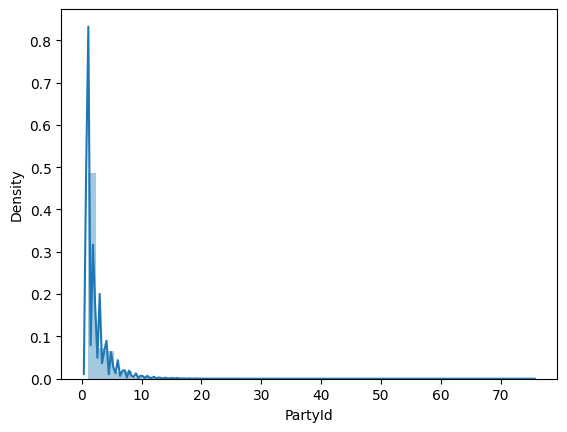

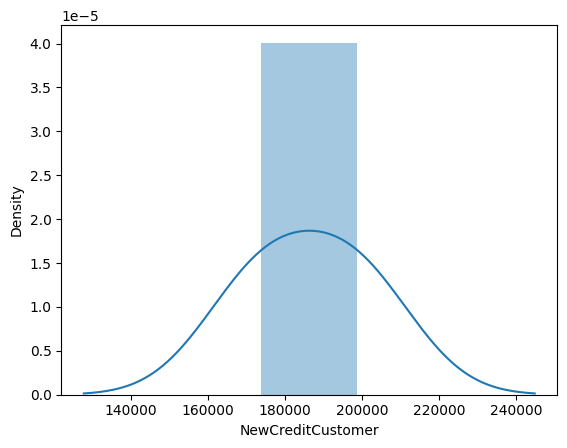

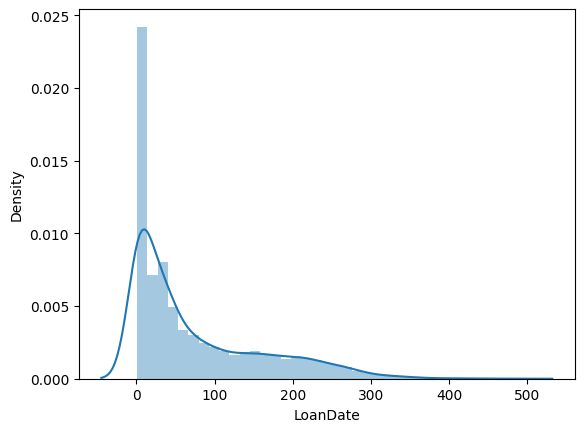

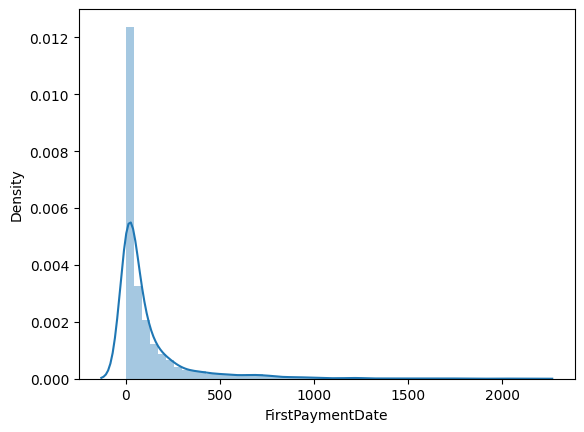

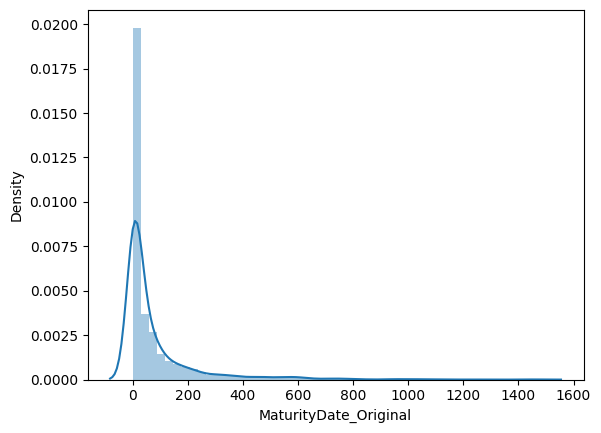

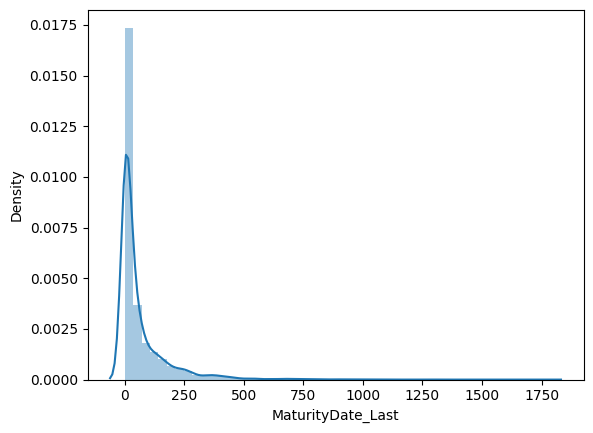

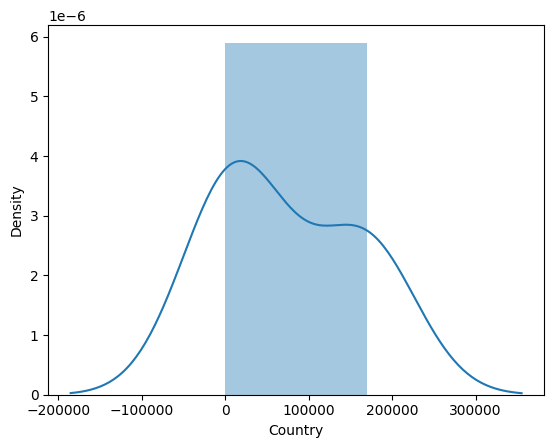

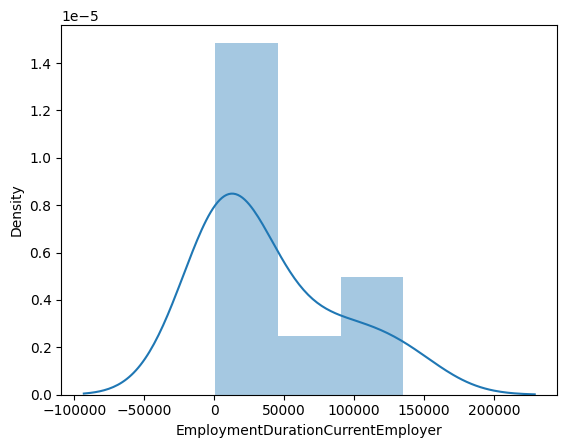

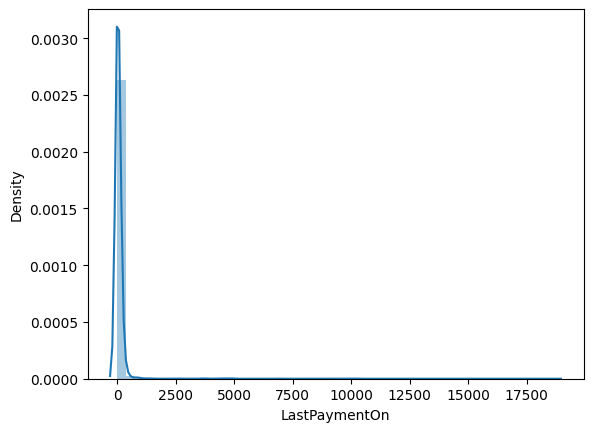

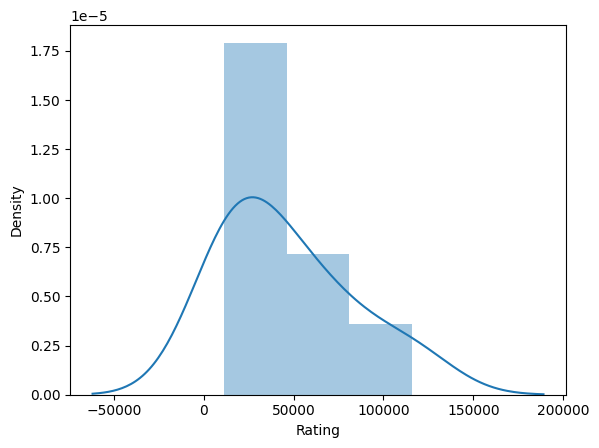

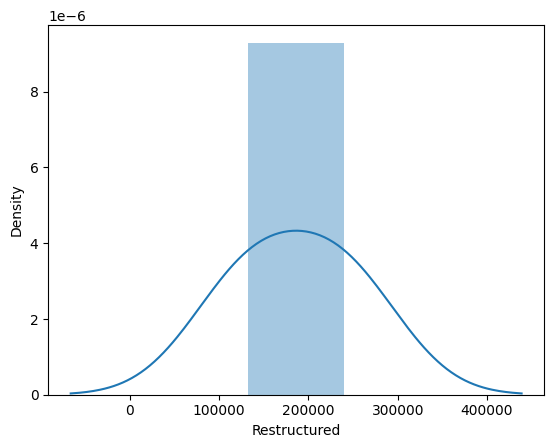

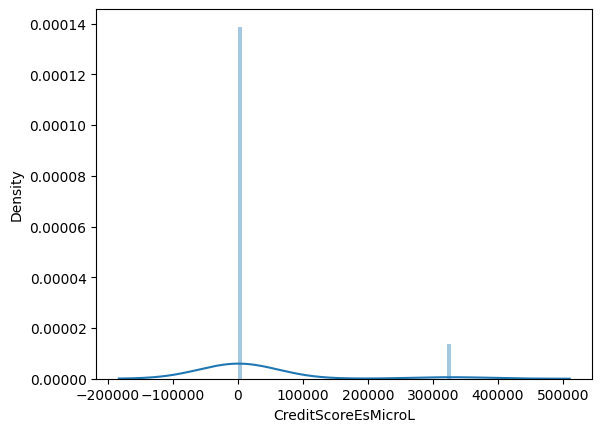

In [24]:
for col in Bondora.columns:
    if Bondora[col].dtype == 'object' or Bondora[col].dtype == 'bool':
        sns.distplot(Bondora[col].value_counts())
        plt.xlabel(col)
        plt.show()
        
        



- As we can see in numeric column distribution there are many columns which are present as numeric but they are actually categorical as per data description such as Verification Type, Language Code, Gender, Use of Loan, Education, Marital Status,EmployementStatus, OccupationArea etc.
- So we will convert these features to categorical features

In [25]:
date_cols=["LoanDate","MaturityDate_Original","MaturityDate_Last",'LastPaymentOn']
Bondora.drop(date_cols,axis=1,inplace=True)
Bondora.shape

(372541, 41)

In [ ]:
# write your code here for Education
Bondora["Education"].replace({1:'Primary education', 2:'Basic education', 3:'Vocational education', 4:'Secondary Education', 5:'Higher education', 0:np.nan, -1:np.nan},inplace=True)
Bondora['Education'].value_counts(dropna=False).to_frame()

,count
Education,
Vocational education,119825
Secondary Education,106787
Higher education,84784
Primary education,43968
NaN,10732
Basic education,6445


In [ ]:
# write your code here for Employment
Bondora["EmploymentStatus"].replace({1:'Unemployed', 2:'Partially employed', 3:'Fully employed', 4:'Self employed', 5:'Entrepreneur', 6:'Retiree', 0:np.nan, -1:np.nan},inplace=True)
Bondora['EmploymentStatus'].value_counts(dropna=False).to_frame()

,count
EmploymentStatus,
NaN,336187
Fully employed,30060
Entrepreneur,2007
Retiree,1800
Self employed,1303
Partially employed,1184


In [ ]:
# write your code here for Gender
Bondora["Gender"].replace({0:'Male', 1:'Woman', 2:'Undefined'},inplace=True)
Bondora['Gender'].value_counts(dropna=False).to_frame()

,count
Gender,
Male,209289
Woman,146497
Undefined,16710
NaN,45


In [ ]:
# write your code here for Home ownership
Bondora["HomeOwnershipType"].replace({0:'Homeless', 1:'Owner', 2:'Living with parents', 3:'Tenant, pre-furnished property', 4:'Tenant, unfurnished property', 5:'Council house', 6:'Joint tenant', 7:'joint ownership', 8:'Mortage', 9:'Owner with encumbrance', 10:'Other', -1:np.nan},inplace=True)
Bondora['HomeOwnershipType'].value_counts(dropna=False).to_frame()

,count
HomeOwnershipType,
Owner,138330
"Tenant, pre-furnished property",118494
Living with parents,41858
Other,30155
Mortage,28647
"Tenant, unfurnished property",4603
joint ownership,3346
Council house,2872
NaN,1660


In [ ]:
# write your code here for LanguageCode
Bondora["LanguageCode"].replace({1:'Estonian', 2:'English', 3:'Russian', 4:'Finnish', 5:'German', 6:'Spanish', 9:'Slovakian', 22:'Other', 15:'Other', 10:'Other', 13:'Other', 7:'Other', 21:'Other'},inplace=True)
Bondora['LanguageCode'].value_counts(dropna=False).to_frame()

,count
LanguageCode,
Finnish,161698
Estonian,130540
Russian,37731
Spanish,30977
19,7023
English,4254
Slovakian,296
Other,12
German,5


In [ ]:
# write your code here for Marital status
Bondora["MaritalStatus"].replace({1:'Married', 2:'Cohabitant', 3:'Single', 4:'Divorced', 5:'Widow', 0:np.nan, -1:np.nan},inplace=True)
Bondora['MaritalStatus'].value_counts(dropna=False).to_frame()

,count
MaritalStatus,
NaN,336011
Single,12400
Married,10752
Cohabitant,9400
Divorced,3377
Widow,601


In [ ]:
# write your code here for Occupation area
Bondora["OccupationArea"].replace({1:'Other', 2:'Mining', 3:'Processing', 4:'Energy', 5:'Utilities', 6:'Construction', 7:'Retail and wholesale', 8:'Transport and warehousing', 9:'Hospitality and catering', 10:'Info and telecom', 11:'Finance and insurance', 12:'Real-estate', 13:'Research', 14:'Administrative', 15:'Civil service & military', 16:'Education', 17:'Healthcare and social help', 18:'Art and entertainment', 19:'Agriculture, forestry and fishing', 0:np.nan, -1:np.nan},inplace=True)
Bondora['OccupationArea'].value_counts(dropna=False).to_frame()

,count
OccupationArea,
NaN,336106
Other,8421
Retail and wholesale,3587
Construction,3312
Processing,3198
Transport and warehousing,2462
Healthcare and social help,2424
Hospitality and catering,2262
Info and telecom,1933


In [ ]:
# write your code here for Use of loan
Bondora["UseOfLoan"].replace({0:'Loan consolidation', 1:'Real estate', 2:'Home improvement', 3:'Business', 4:'Education', 5:'Travel', 6:'Vehicle', 7:'Other', 8:'Health', 101:'Working capital financing', 102:'Purchase of machinery equipment', 103:'Renovation of real estate', 104:'Accounts receivable financing', 105:'Acquisition of means of transport', 106:'Construction finance', 107:'Acquisition of stocks', 108:'Acquisition of real estate', 109:'Guaranteeing obligation', 110:'Other business', -1:np.nan},inplace=True)
Bondora['UseOfLoan'].value_counts(dropna=False).to_frame()

,count
UseOfLoan,
NaN,335953
Other,9700
Home improvement,9191
Loan consolidation,6914
Vehicle,3151
Business,1952
Travel,1787
Health,1519
Education,1366


In [ ]:
# write your code here for Verification type
Bondora["VerificationType"].replace({0:'Not set', 1:'Income unverified', 2:'Income unverified, cross-referenced by phone', 3:'Income verified', 4:'Income and expenses verified'},inplace=True)
Bondora['VerificationType'].value_counts(dropna=False).to_frame()

,count
VerificationType,
Income and expenses verified,304881
Income unverified,56346
Income verified,9428
"Income unverified, cross-referenced by phone",1828
NaN,50
Not set,8


In [ ]:
Bondora['Country'].replace({'EE':'Estonia', 'ES':'Spain', 'SK':'Slovakia', 'FI':'Finland', 'NL':'Netherlands'},inplace=True)
Bondora['Country'].value_counts()

Country
Estonia        169801
Finland        164134
Spain           31111
Netherlands      7199
Slovakia          296
Name: count, dtype: int64

In [ ]:
Bondora['loanStatus']=Bondora['loanStatus'].astype(str)
Bondora['VerificationType']=Bondora['VerificationType'].astype(str)
Bondora['Gender']=Bondora['Gender'].astype(str)
Bondora['LanguageCode']=Bondora['LanguageCode'].astype(str)
Bondora['MaritalStatus']=Bondora['MaritalStatus'].astype(str)
Bondora['UseOfLoan']=Bondora['UseOfLoan'].astype(str)
Bondora['Education']=Bondora['Education'].astype(str)
Bondora['EmploymentStatus']=Bondora['EmploymentStatus'].astype(str)
Bondora['NewCreditCustomer']=Bondora['NewCreditCustomer'].astype(str)
Bondora['Restructured']=Bondora['Restructured'].astype(str)
Bondora['OccupationArea']=Bondora['OccupationArea'].astype(str)
Bondora['HomeOwnershipType']=Bondora['HomeOwnershipType'].astype(str)
Bondora.drop(['PartyId',],axis=1,inplace=True)

In [ ]:
# final shape of the dataset
Bondora.shape

(372541, 40)

In [ ]:
# save the final data
Bondora.to_csv('dataset/preprocessed_data.csv',index=False)